In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# 1. Load and Preprocess Data
# Assume you have a CSV file with columns: 'Artist', 'Song Title', 'Release Year', 'Genre', 'Lyrics', 'Topic', 'Interested'
# Load dataset
df = pd.read_csv("lyrics_data_music.csv")

# Drop rows with any missing values in the important columns
df = df.dropna(subset=['Artist', 'Song Title', 'Release Year', 'Genre', 'Lyrics', 'Topic'])

# Remove stopwords from lyrics
df['Lyrics'] = df['Lyrics'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
df['Interested'] = df['Genre'].apply(lambda x: 'Yes' if x in ['reggae','rock','hip hop'] else 'No')
# 2. Split Data
X = df['Lyrics']
y = df['Interested']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saite\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=0.0, max_df=1.0, max_features=1000, lowercase=True)
vectorizer.fit(x_train)
x_train = vectorizer.transform(x_train)
x_test = vectorizer.transform(x_test)

In [3]:
X_train = x_train.astype('float32')
y_train = y_train.replace({'No': 0, 'Yes': 1}).astype('float32')
X_test = x_test.astype('float32')
y_test = y_test.replace({'No': 0, 'Yes': 1}).astype('float32')

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Support Vector Machines

In [5]:
from sklearn.svm import SVC
classifier_rbf=SVC (kernel='rbf',random_state=0)
classifier_rbf.fit(X_train,y_train)
y_pred_bf=classifier_rbf.predict(X_test)

In [6]:
from sklearn.metrics import confusion_matrix
cm_rbf=confusion_matrix(y_test,y_pred_bf)
print(cm_rbf)

[[4113   65]
 [1235  262]]


In [7]:
from sklearn.metrics import classification_report
class_report_rbf=classification_report(y_test,y_pred_bf)
print(class_report_rbf)

              precision    recall  f1-score   support

         0.0       0.77      0.98      0.86      4178
         1.0       0.80      0.18      0.29      1497

    accuracy                           0.77      5675
   macro avg       0.79      0.58      0.58      5675
weighted avg       0.78      0.77      0.71      5675



### Random_Forest_Algorithm

In [8]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=10,random_state=0)
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [9]:
y_pred=model.predict(X_test)

In [10]:
from sklearn.metrics import classification_report
import numpy as np

# Convert continuous predictions to binary or discrete classes, e.g., using rounding
y_pred_class = np.round(y_pred).astype(int)  
# Generate the classification report
class_report_RFR = classification_report(y_test, y_pred_class)
print(class_report_RFR)


              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85      4178
         1.0       0.59      0.27      0.37      1497

    accuracy                           0.76      5675
   macro avg       0.69      0.60      0.61      5675
weighted avg       0.73      0.76      0.72      5675



### Navie_Bayes_Algorithm

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [12]:
# Convert sparse matrices to dense
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Initialize and fit the model
nb1 = GaussianNB()
nbg_pred=nb1.fit(X_train_dense, y_train)

In [13]:
# Generate predictions
nbg_pred = nb1.predict(X_test_dense)

# Now create the classification report
from sklearn.metrics import classification_report
class_report_RFR = classification_report(y_test, nbg_pred)
print(class_report_RFR)

              precision    recall  f1-score   support

         0.0       0.80      0.71      0.75      4178
         1.0       0.39      0.52      0.45      1497

    accuracy                           0.66      5675
   macro avg       0.60      0.61      0.60      5675
weighted avg       0.70      0.66      0.67      5675



### Linear_Regression_Algorithm

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#load the model
lr= LinearRegression()
#train the model on the training model
lr.fit(X_train,y_train)
#predicting the test data so that we can later evalute the model
pred_lr=lr.predict(X_test)

In [15]:
# Ensure pred_lr contains class labels, not probabilities
pred_lr = model.predict(X_test)  # Replace 'model' with your trained model name

In [16]:
# If pred_lr contains probabilities, convert to class labels
pred_lr = (pred_lr >= 0.5).astype(int)  # Adjust threshold as needed for binary classification

In [17]:
from sklearn.metrics import classification_report
class_report_lr = classification_report(y_test, pred_lr)
print(class_report_lr)

              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83      4178
         1.0       0.51      0.36      0.42      1497

    accuracy                           0.74      5675
   macro avg       0.65      0.62      0.63      5675
weighted avg       0.72      0.74      0.72      5675



### K-NN Algorithm

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
pred_knn = model.predict(X_test)
# Evaluate regression metrics
mse = mean_squared_error(y_test, pred_knn)
r2 = r2_score(y_test, pred_knn)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.18391518600097898
R-squared: 0.05298010113045826


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Instantiate and fit a classifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Predict and evaluate
pred_knn = model.predict(X_test)
class_report = classification_report(y_test, pred_knn)
print(class_report)

              precision    recall  f1-score   support

         0.0       0.77      0.93      0.84      4178
         1.0       0.52      0.21      0.29      1497

    accuracy                           0.74      5675
   macro avg       0.64      0.57      0.57      5675
weighted avg       0.70      0.74      0.70      5675



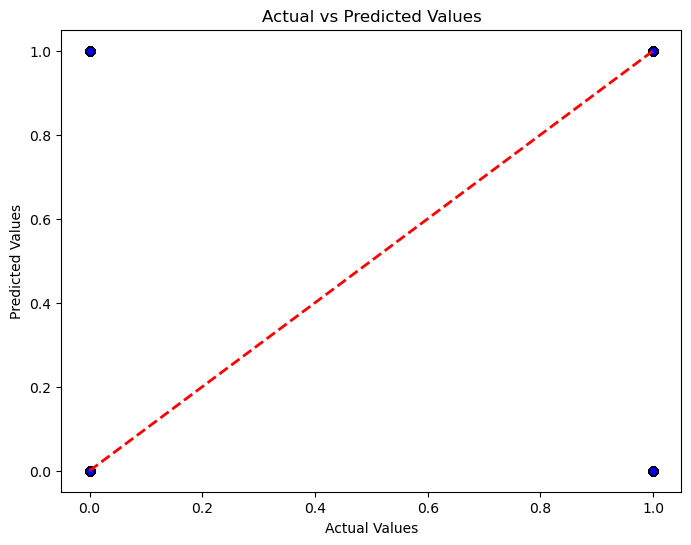

In [20]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_knn, color='blue', alpha=0.6, edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)  # Line y=x
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

In [ ]:
import seaborn as sns
import numpy as np

# Calculate residuals
residuals = y_test - pred_knn

# Plot the distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="purple")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Error Distribution")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate and display confusion matrix
conf_matrix = confusion_matrix(y_test, pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate regression metrics
mae = mean_absolute_error(y_test, pred_y)
mse = mean_squared_error(y_test, pred_y)
r2 = r2_score(y_test, pred_y)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

### Neural Network

In [21]:
from sklearn.model_selection import train_test_split

# Assuming song_data is your DataFrame
# Here, X represents the feature columns, and y is the target variable, for example, 'Romantic'

# Define features and target
X = df['Lyrics']
y = df['Interested']

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Check the results
print("Training set size:", len(x_train))
print("Test set size:", len(x_test))

Training set size: 22697
Test set size: 5675


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df = 0.0, max_df = 1.0, max_features = 1000,lowercase = True)
vectorizer.fit(x_train)
vectorizer.fit(x_test)
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)

In [23]:
# 4. Set up the NN
from keras.models import Sequential
from keras import layers
from keras import models
input_dimension = X_train.shape[1]
print(input_dimension)
model = Sequential()
model.add(layers.Dense(16, input_dim = input_dimension, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

1000


C:\Users\saite\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(loss = 'binary_crossentropy',
optimizer = 'adam',
metrics = ['accuracy'])
# summarize the model to make sure that it's structured as intended
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │          16,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,577 (64.75 KB)

 Trainable params: 16,577 (64.75 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
X_train = X_train.astype('float32')
y_train = y_train.replace({'No': 0, 'Yes': 1}).astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.replace({'No': 0, 'Yes': 1}).astype('float32')

In [26]:
history = model.fit(X_train, y_train,
epochs=30,
verbose=True,
validation_data=(X_test, y_test),
batch_size=10)

Epoch 1/30
2270/2270 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7522 - loss: 0.5586 - val_accuracy: 0.7727 - val_loss: 0.5095
Epoch 2/30
2270/2270 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7905 - loss: 0.4681 - val_accuracy: 0.7741 - val_loss: 0.5088
Epoch 3/30
2270/2270 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8023 - loss: 0.4408 - val_accuracy: 0.7723 - val_loss: 0.5231
Epoch 4/30
2270/2270 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8189 - loss: 0.4059 - val_accuracy: 0.7649 - val_loss: 0.5645
Epoch 5/30
2270/2270 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8426 - loss: 0.3645 - val_accuracy: 0.7417 - val_loss: 0.5811
Epoch 6/30
2270/2270 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8599 - loss: 0.3315 - val_accuracy: 0.7454 - val_loss: 0.6198
Epoch 7/30
2270/2270 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8807 - loss: 0.2936 - val_accuracy: 0.7272 - val_loss: 0.6813
Epoch 8/30
2270/2270 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8939 - loss: 0.2643 -

In [27]:
from keras.backend import clear_session
clear_session()

In [28]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 0.9816
Testing Accuracy: 0.6989


In [29]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │          16,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,733 (194.27 KB)

 Trainable params: 16,577 (64.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33,156 (129.52 KB)

None


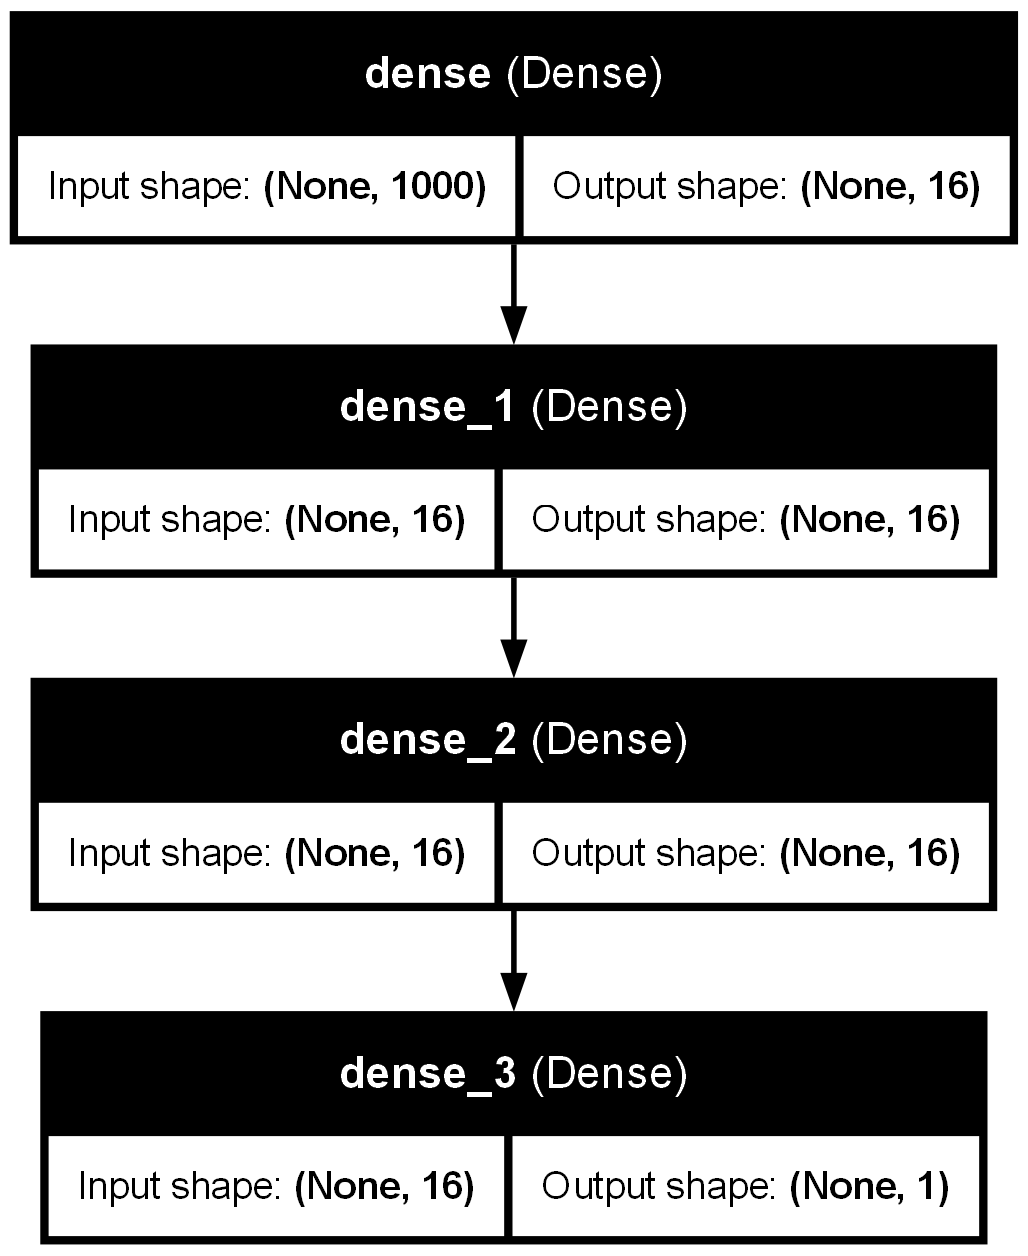

In [30]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True,show_layer_names=True)

In [31]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training accuracy')
    plt.plot(x, val_acc, 'r', label = 'Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend(fontsize = 14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    #plt.savefig('acc.svg')
    #plt.show()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend(fontsize = 14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.savefig('loss.svg')
    plt.show()


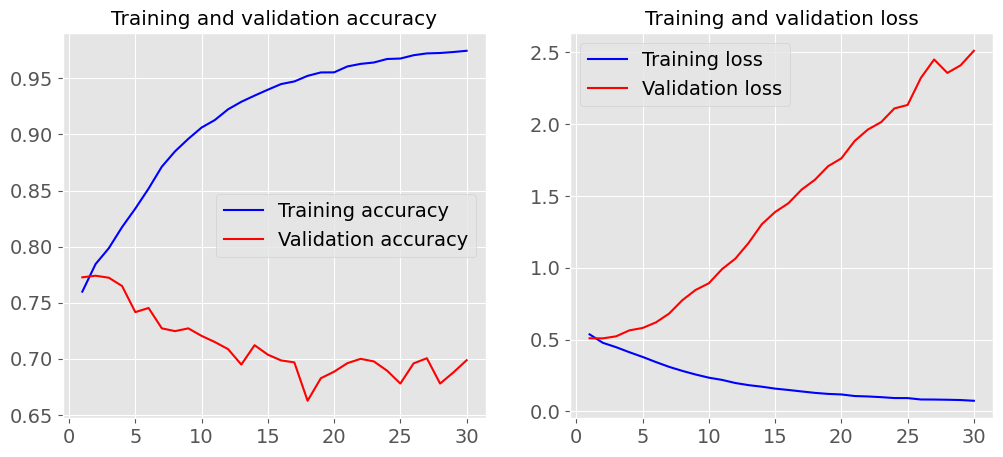

In [32]:
plot_history(history)

In [33]:
# 4. Set up the NN
from keras.models import Sequential
from keras import layers
from keras import models

input_dimension = X_train.shape[1]
print(input_dimension)

model = Sequential()
model.add(layers.Dense(32, input_dim = input_dimension, activation = 'swish'))

model.add(layers.Dense(32, activation = 'swish'))
model.add(layers.Dense(32, activation = 'swish'))

model.add(layers.Dense(1, activation = 'sigmoid'))

1000


C:\Users\saite\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.compile(loss = 'binary_crossentropy',
optimizer = 'adam',
metrics = ['accuracy'])
# summarize the model to make sure that it's structured as intended
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │          32,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,177 (133.50 KB)

 Trainable params: 34,177 (133.50 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history = model.fit(X_train, y_train,
epochs=20,
verbose=True,
validation_data=(X_test, y_test),
batch_size=10)

Epoch 1/20
2270/2270 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7518 - loss: 0.5456 - val_accuracy: 0.7753 - val_loss: 0.5027
Epoch 2/20
2270/2270 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7981 - loss: 0.4603 - val_accuracy: 0.7653 - val_loss: 0.5256
Epoch 3/20
2270/2270 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8314 - loss: 0.4009 - val_accuracy: 0.7556 - val_loss: 0.5608
Epoch 4/20
2270/2270 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8688 - loss: 0.3209 - val_accuracy: 0.7403 - val_loss: 0.6319
Epoch 5/20
2270/2270 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9047 - loss: 0.2451 - val_accuracy: 0.7408 - val_loss: 0.8107
Epoch 6/20
2270/2270 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9249 - loss: 0.1936 - val_accuracy: 0.7311 - val_loss: 0.8953
Epoch 7/20
2270/2270 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9436 - loss: 0.1518 - val_accuracy: 0.7191 - val_loss: 1.1163
Epoch 8/20
2270/2270 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9578 - loss: 0.

In [36]:
from keras.backend import clear_session
clear_session()

In [37]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 0.9920
Testing Accuracy: 0.7087


In [38]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training accuracy')
    plt.plot(x, val_acc, 'r', label = 'Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend(fontsize = 14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    #plt.savefig('acc.svg')
    #plt.show()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend(fontsize = 14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.savefig('loss.svg')
    plt.show()

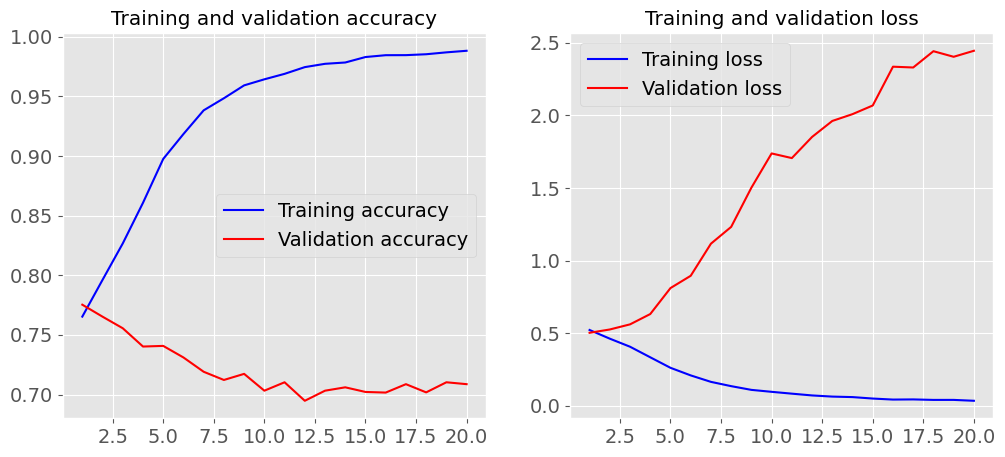

In [39]:
plot_history(history)

### BERT

In [ ]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from transformers import TrainingArguments

# Assuming 'selected_rows' is your DataFrame and 'Cleaned_Lyrics' and 'Interested' are columns
X = df['Lyrics'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
y = df['Interested'].replace({'No': 0, 'Yes': 1})  # Convert labels to binary

# Split data into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True, max_length=512)

# Define a custom dataset class for binary classification
class BinaryClassificationDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels.iloc[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create the train and test datasets
train_dataset = BinaryClassificationDataset(train_encodings, train_labels)
test_dataset = BinaryClassificationDataset(test_encodings, test_labels)

# Load the pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

In [ ]:
# Set up training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=100,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=5,
    eval_strategy="epoch",  # Use eval_strategy instead of evaluation_strategy
    save_strategy="epoch",
    report_to=["none"]
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train the model
trainer.train()

# Save the fine-tuned model and tokenizer
model.save_pretrained('./fine_tuned_bert')
tokenizer.save_pretrained('./fine_tuned_bert')

# Evaluate the model and print the classification report
predictions = trainer.predict(test_dataset)
preds = predictions.predictions.argmax(-1)
print(classification_report(test_labels, preds))

